# Testing DeepER

### Import libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../')

In [2]:
import time
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from deeper_model import build_model
from deeper_utils import preprocess_data
from custom_callbacks import Metrics

Using TensorFlow backend.


### Read the dataset

In [3]:
trainData, testData, valData, embeddingMatrix, wordsWithNoEmbeddings = preprocess_data(
    'BeerAdvo-RateBeer', baseDir = '../input', embeddingDir='fasttextmodel', datasetDir='deeperdatasets/datasets', maxSequenceLength=100)

Printing out words with no embeddings in GloVe

In [4]:
PRINT_RANGE = 30

if len(wordsWithNoEmbeddings) < PRINT_RANGE:
    PRINT_RANGE = len(wordsWithNoEmbeddings)

if PRINT_RANGE > 0:   
    for i in range(PRINT_RANGE):
        print(wordsWithNoEmbeddings[i])

print('...')
print("There are {} words with no embeddings in GloVe".format(len(wordsWithNoEmbeddings)))

...
There are 0 words with no embeddings in GloVe


Print embedding matrix shape

In [5]:
embeddingMatrix.shape

(1212, 300)

In [6]:
leftTableTrainData, rightTableTrainData, trainLabels = trainData
leftTableTestData, rightTableTestData, testLabels = testData
leftTableValData, rightTableValData, valLabels = valData

Print training set size

In [7]:
print(leftTableTrainData.shape)
print(rightTableTrainData.shape)

(268, 100)
(268, 100)


Print test set size

In [8]:
print(leftTableTestData.shape)
print(rightTableTestData.shape)

(91, 100)
(91, 100)


Print validation set size

In [9]:
print(leftTableValData.shape)
print(rightTableValData.shape)

(91, 100)
(91, 100)


### Build the DeepER model 

In [10]:
model = build_model(embeddingMatrix, lstmUnits=75, denseUnits=[16, 8], lstm_dropout=0.1, mask_zero=True, maxSequenceLength=100)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 300)     363600      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 150)          225600      embedding_1[0][0]                
          

### Plot DeepER architecture

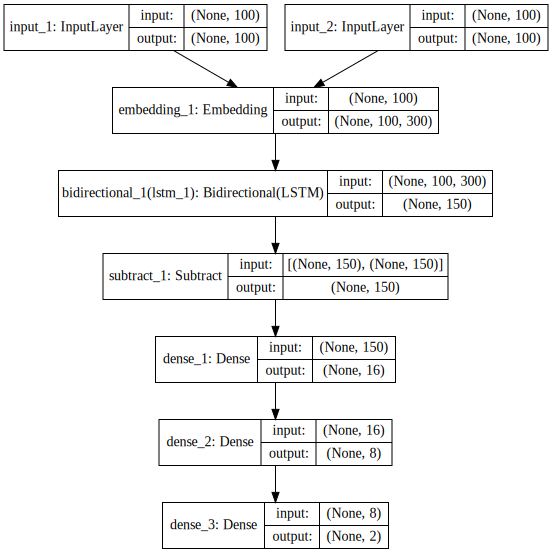

In [11]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Training

In [12]:
start_time = time.time()

metricsHistory = Metrics()

testBinaryLabels = testLabels.argmax(axis=1)
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(testBinaryLabels),
                                                 testBinaryLabels)

history = model.fit([leftTableTrainData,
           rightTableTrainData],
          trainLabels,
          batch_size=16,
          epochs=20,
          callbacks=[metricsHistory],
          validation_data=([leftTableValData,
                            rightTableValData],
                           valLabels))

elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)

Train on 268 samples, validate on 91 samples
Epoch 1/20
268/268 [==============================] - 11s 41ms/step - loss: 0.5290 - acc: 0.8060 - val_loss: 0.4170 - val_acc: 0.8462


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


val_f1:0.0	val_precision: 0.0	val_recall: 0.0

Epoch 2/20
268/268 [==============================] - 6s 24ms/step - loss: 0.2577 - acc: 0.8507 - val_loss: 0.3789 - val_acc: 0.8462


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


val_f1:0.0	val_precision: 0.0	val_recall: 0.0

Epoch 3/20
268/268 [==============================] - 6s 24ms/step - loss: 0.1542 - acc: 0.8507 - val_loss: 0.3765 - val_acc: 0.8462


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


val_f1:0.0	val_precision: 0.0	val_recall: 0.0

Epoch 4/20
268/268 [==============================] - 6s 23ms/step - loss: 0.1193 - acc: 0.9067 - val_loss: 0.4087 - val_acc: 0.7802
Updating best model
Current best model comes from epoch 3
val_f1:0.38	val_precision: 0.33	val_recall: 0.43

Epoch 5/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0972 - acc: 0.9888 - val_loss: 0.4842 - val_acc: 0.6593
val_f1:0.34	val_precision: 0.24	val_recall: 0.57

Epoch 6/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0688 - acc: 0.9963 - val_loss: 0.7376 - val_acc: 0.6703
Updating best model
Current best model comes from epoch 5
val_f1:0.42	val_precision: 0.29	val_recall: 0.79

Epoch 7/20
268/268 [==============================] - 6s 23ms/step - loss: 0.0128 - acc: 1.0000 - val_loss: 1.1899 - val_acc: 0.6264
val_f1:0.39	val_precision: 0.26	val_recall: 0.79

Epoch 8/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0040 - acc: 1.0000 - val_los

### Plot loss

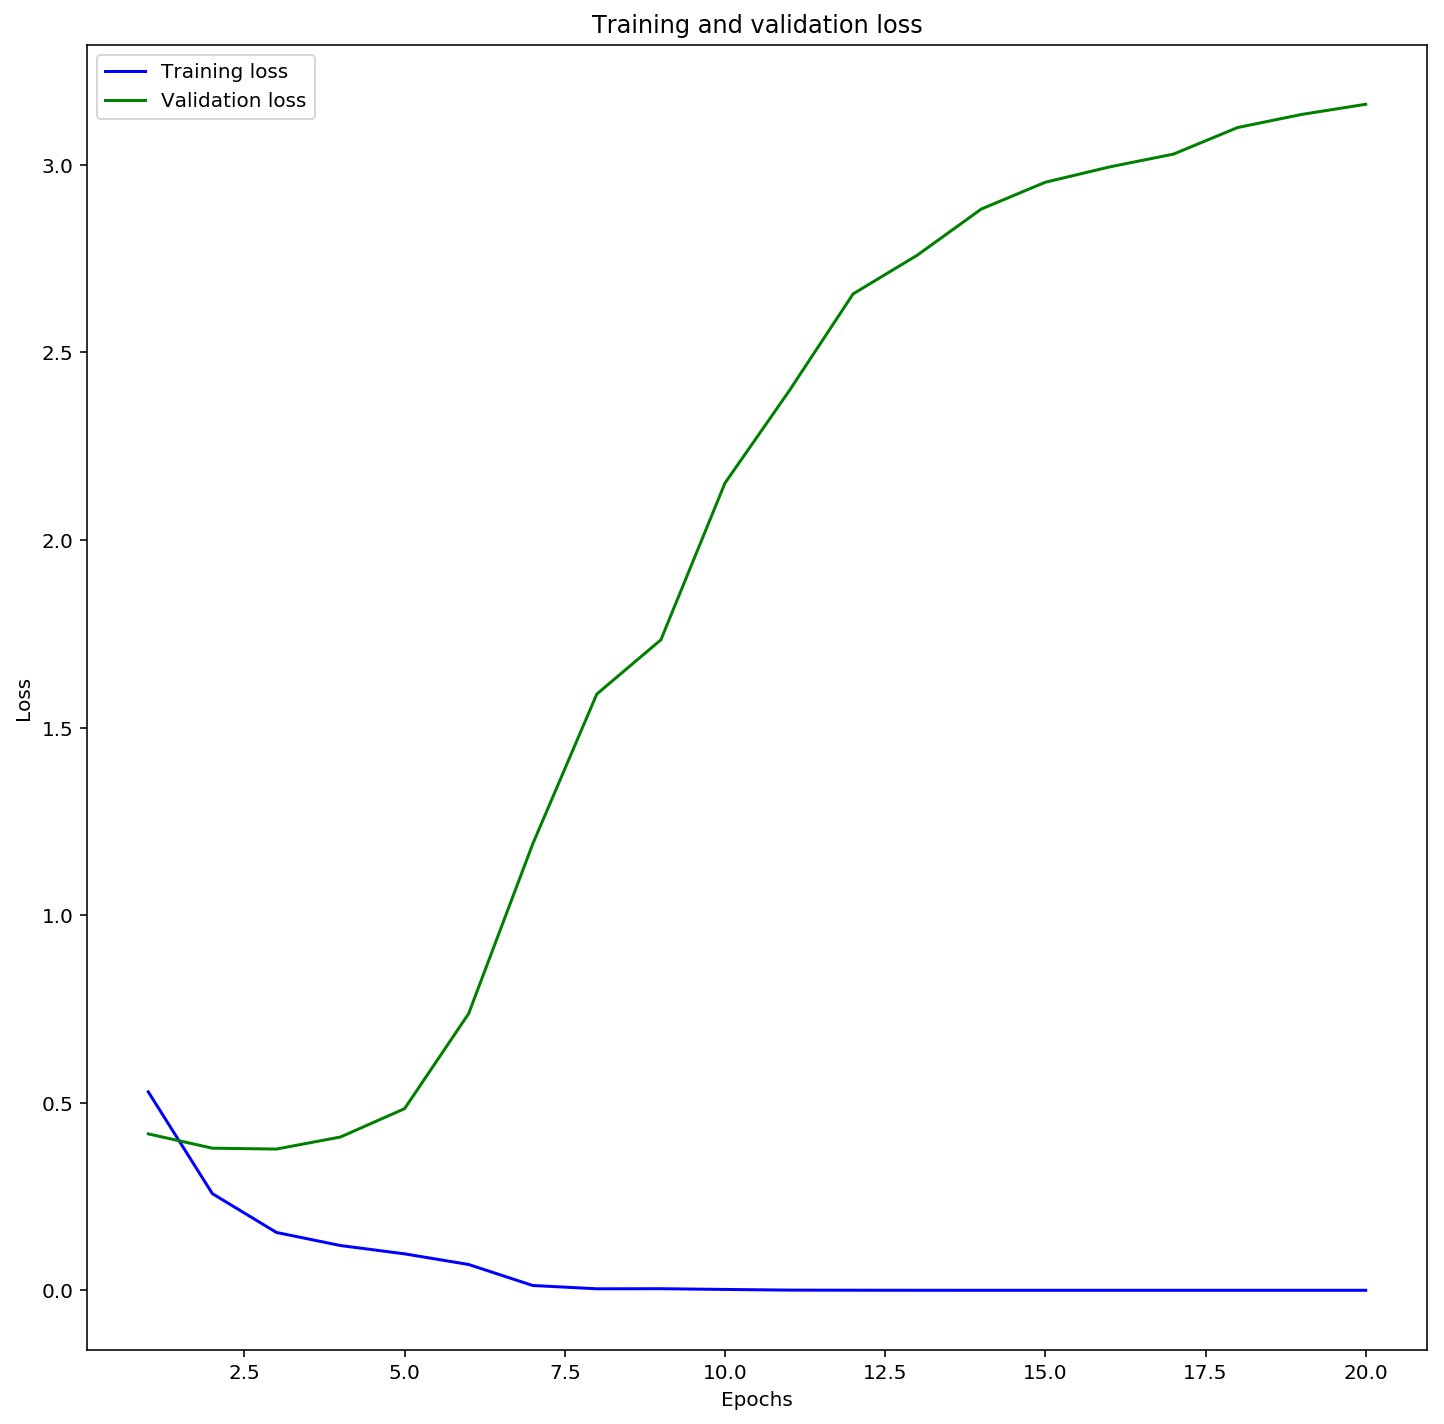

In [13]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Plot accuracy

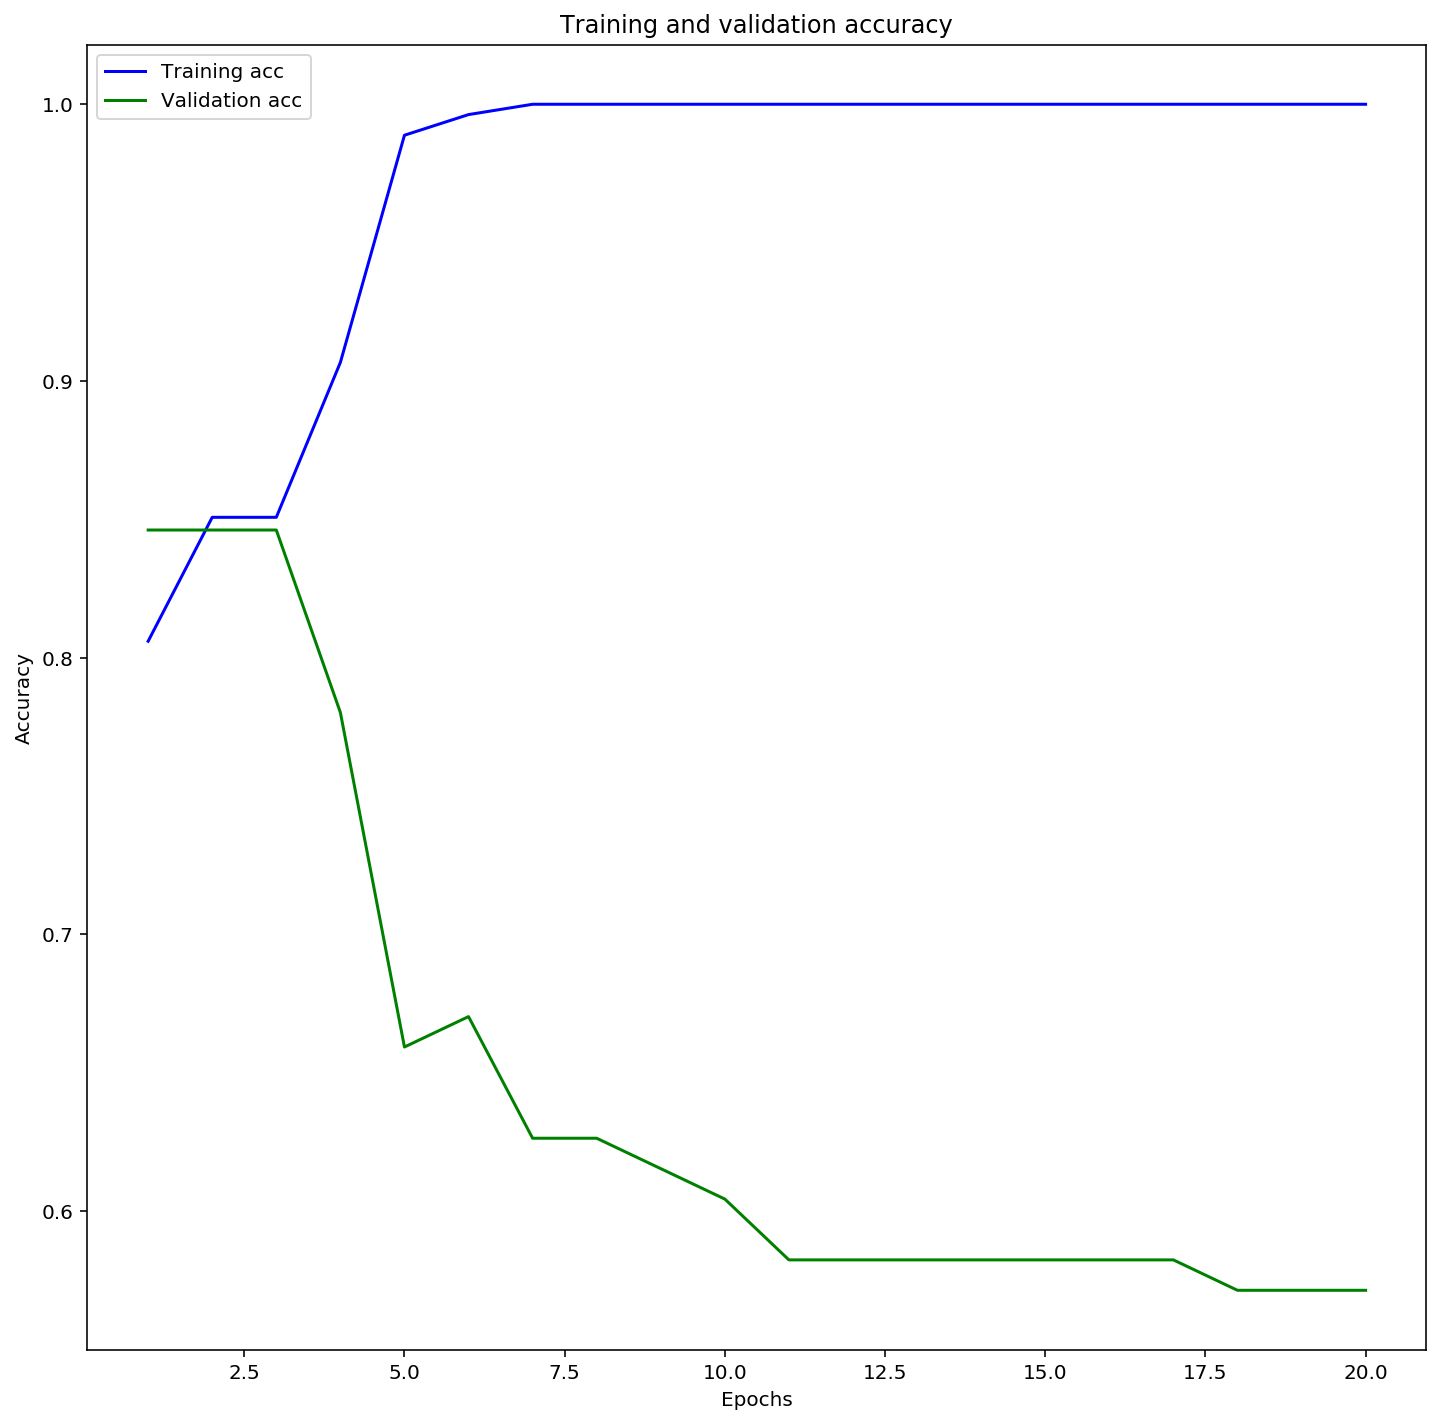

In [14]:
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Plot precision (for matching records)

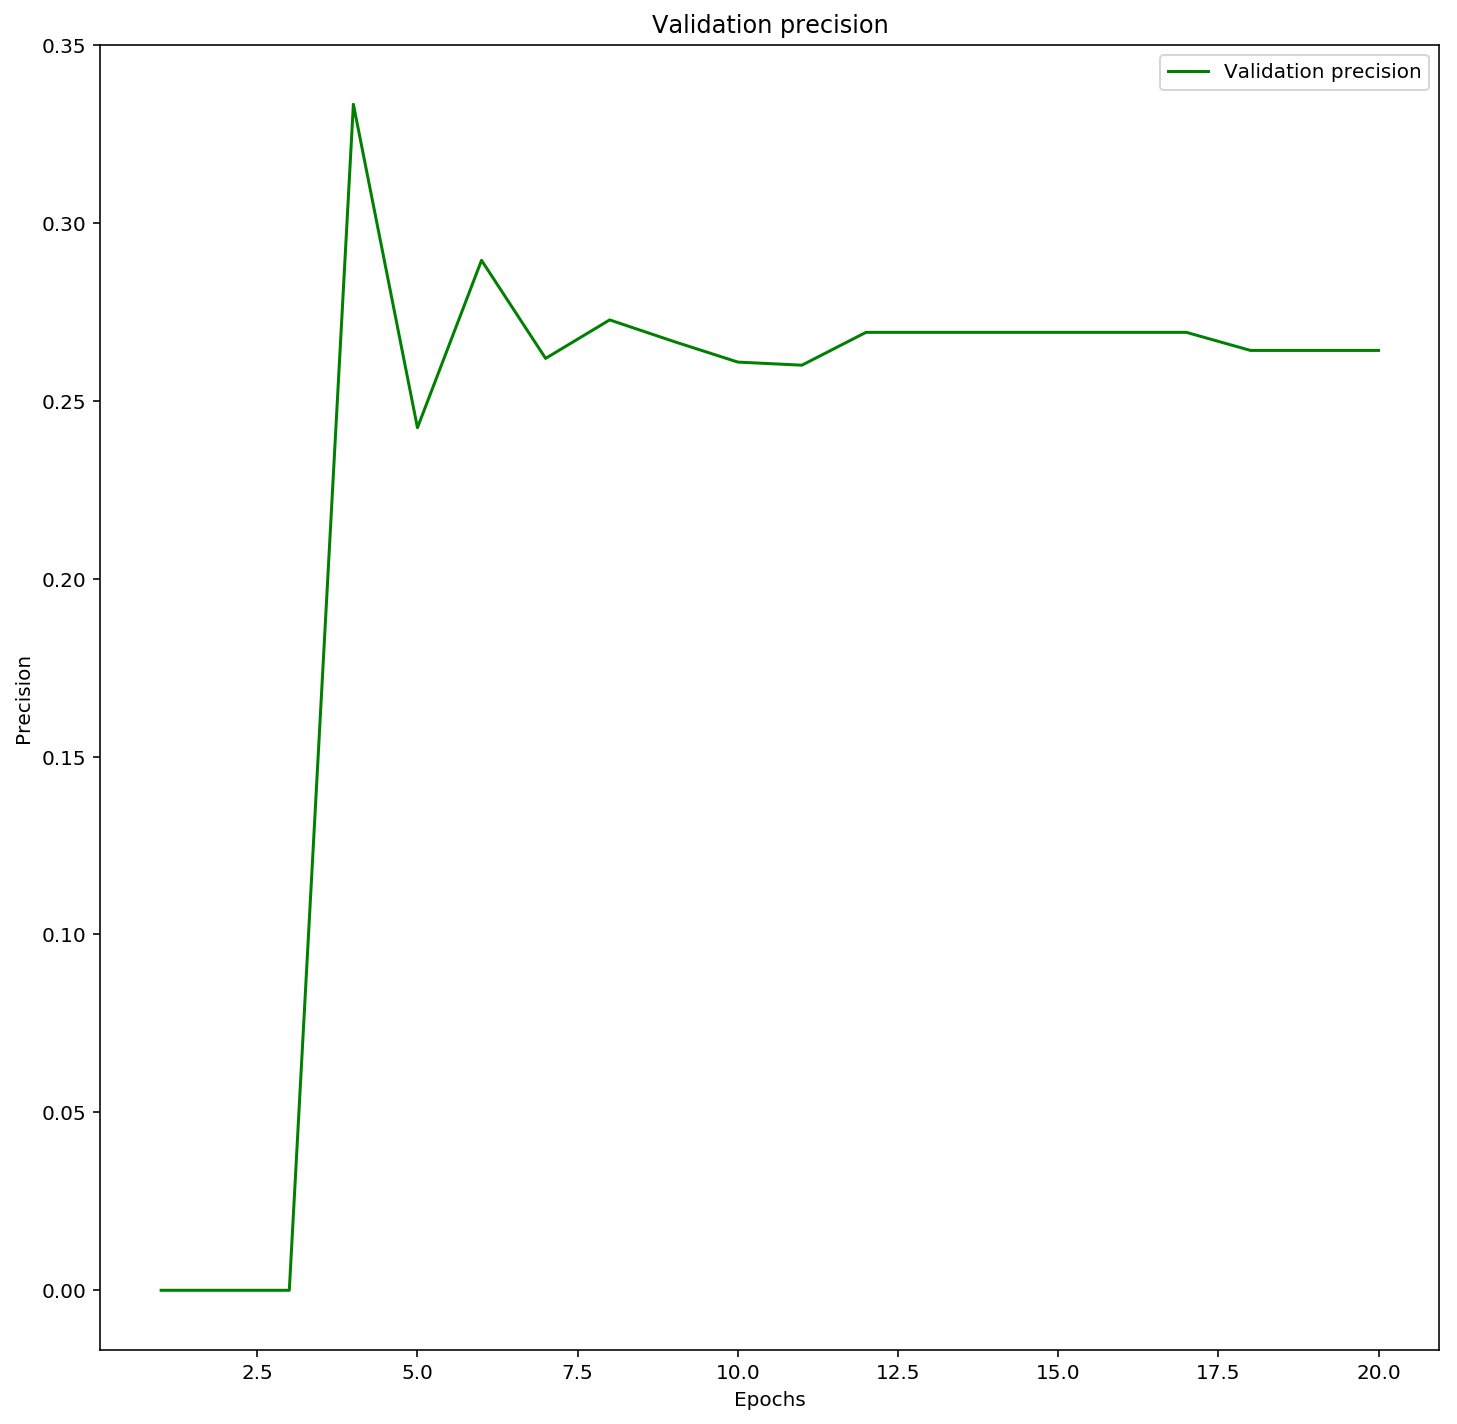

In [15]:
plt.figure(figsize=(12,12))
valPrecision = metricsHistory.valPrecisionHistory
plt.plot(epochs, valPrecision, 'g', label='Validation precision')
plt.title('Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

### Plot recall (for matching records)

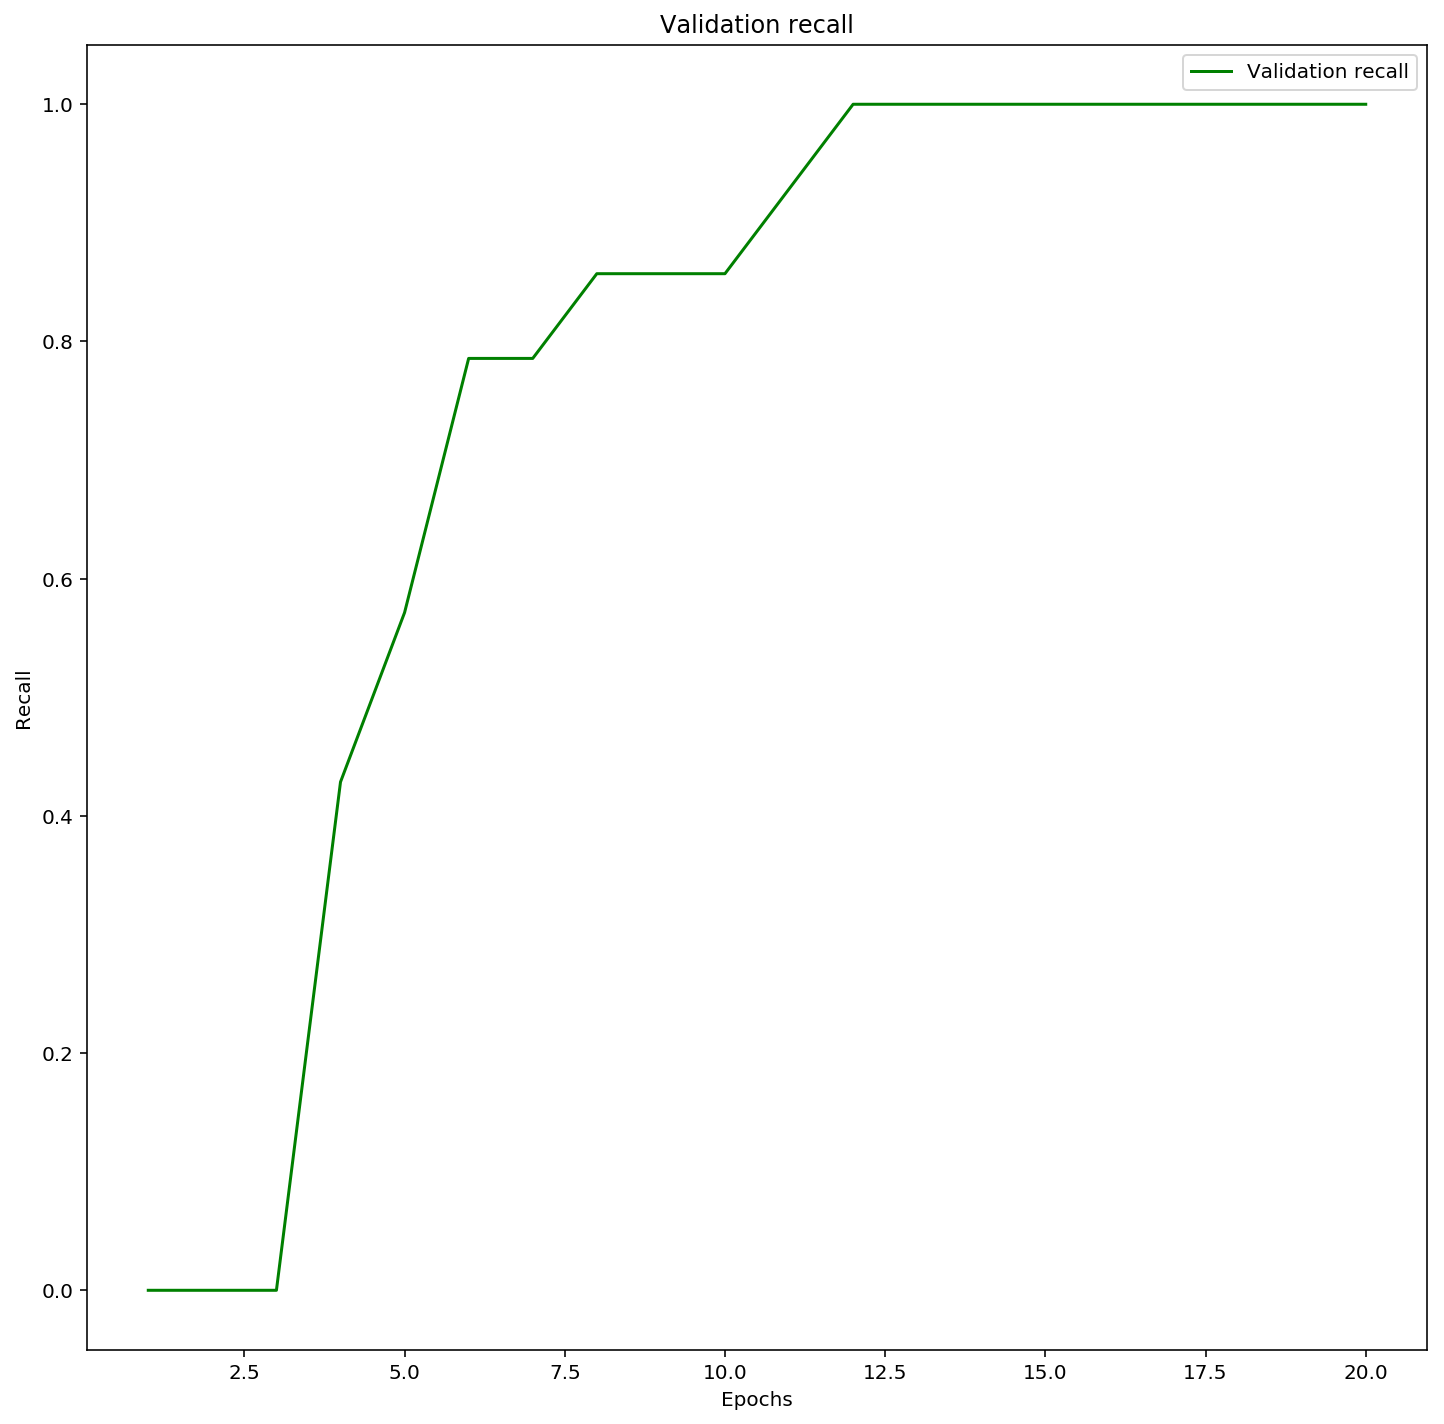

In [16]:
plt.figure(figsize=(12,12))
valRecall = metricsHistory.valRecallHistory
plt.plot(epochs, valRecall, 'g', label='Validation recall')
plt.title('Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

### Plot F-measure (for matching records)

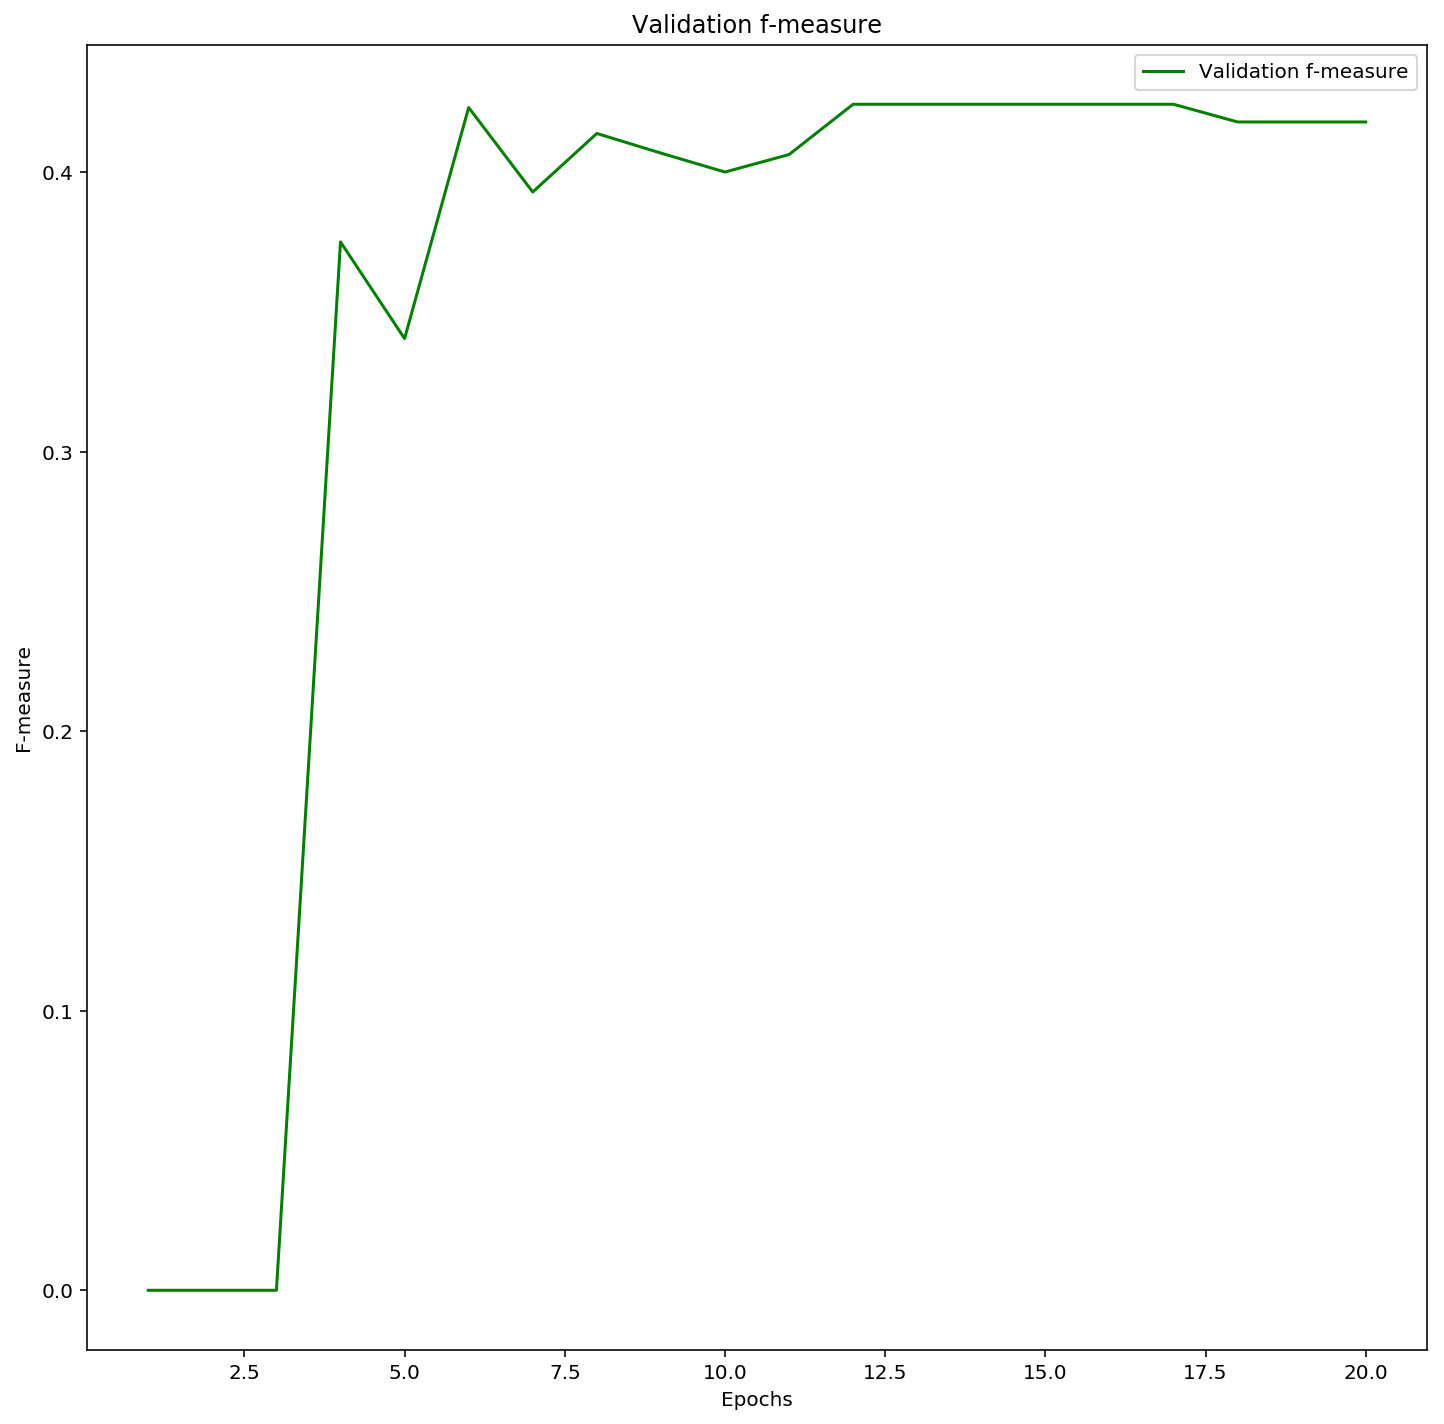

In [17]:
plt.figure(figsize=(12,12))
valFMeasure = metricsHistory.valFMeasureHistory
plt.plot(epochs, valFMeasure, 'g', label='Validation f-measure')
plt.title('Validation f-measure')
plt.xlabel('Epochs')
plt.ylabel('F-measure')
plt.legend()

### Evaluating the model trained on 20 epoch

### Predict labels on test data 

In [18]:
predictedLabels = model.predict(x=[leftTableTestData, rightTableTestData])
predictedBinaryLabels = predictedLabels.argmax(axis=1)

### Compute confusion matrix

[Text(0, 0.5, 'non matching'), Text(0, 1.5, 'matching')]

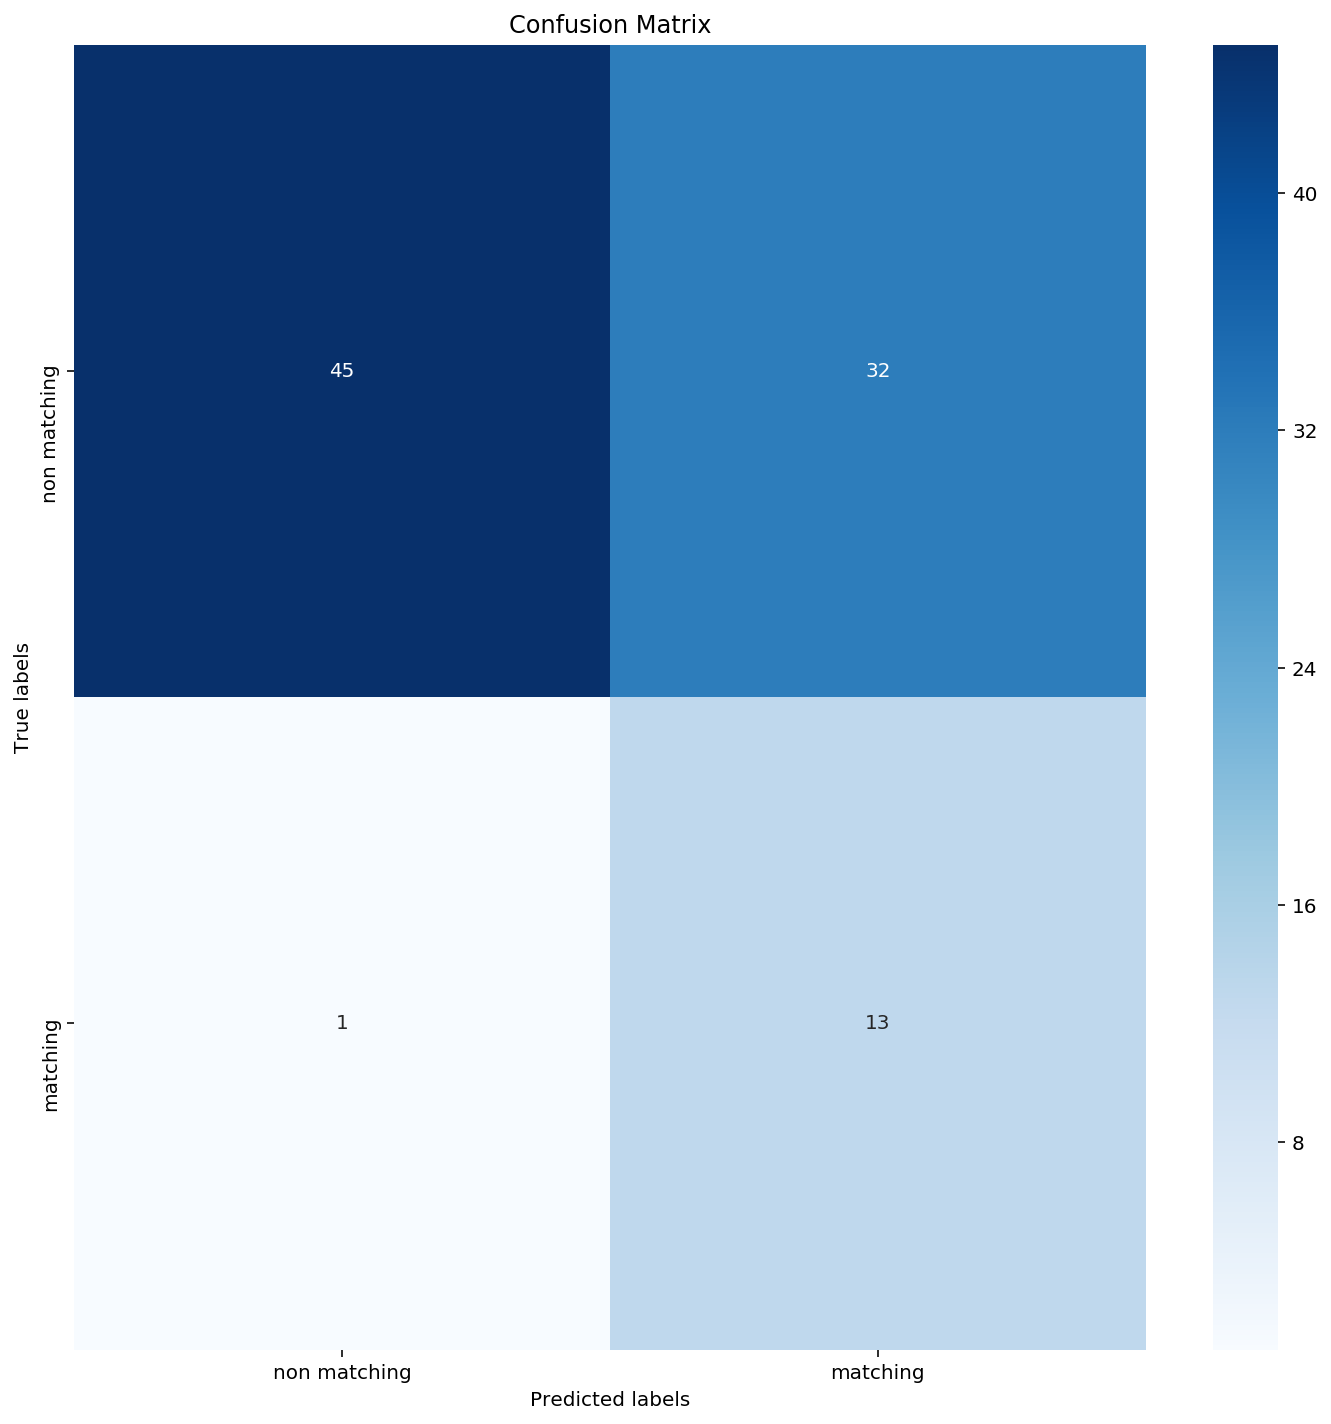

In [19]:
cm = confusion_matrix(testBinaryLabels, predictedBinaryLabels)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['non matching', 'matching'])
ax.yaxis.set_ticklabels(['non matching', 'matching'])

### Compute metrics

In [20]:
precisionValues, recallValues, fMeasureValues, supportValues = precision_recall_fscore_support(testBinaryLabels, predictedBinaryLabels)

NUM_LABELS = len(precisionValues)

row_format ="{:>15}" * 5
print(row_format.format('Label','Precision', 'Recall', 'F-measure', 'Support'))

for i in range(NUM_LABELS):
    fMeasure = fMeasureValues[i]
    
    if fMeasure is None:
        fMeasure = 0.0
        
    print(row_format.format(i, round(precisionValues[i], 2), round(recallValues[i], 2), round(fMeasureValues[i],2), round(supportValues[i],2)))

          Label      Precision         Recall      F-measure        Support
              0           0.98           0.58           0.73             77
              1           0.29           0.93           0.44             14


---

### Evaluating the "best" model

### Loading the model

In [21]:
bestModel = load_model('best-model.h5')

### Predict labels on test data 

In [22]:
predictedLabels = bestModel.predict(x=[leftTableTestData, rightTableTestData])
predictedBinaryLabels = predictedLabels.argmax(axis=1)

### Compute confusion matrix

[Text(0, 0.5, 'non matching'), Text(0, 1.5, 'matching')]

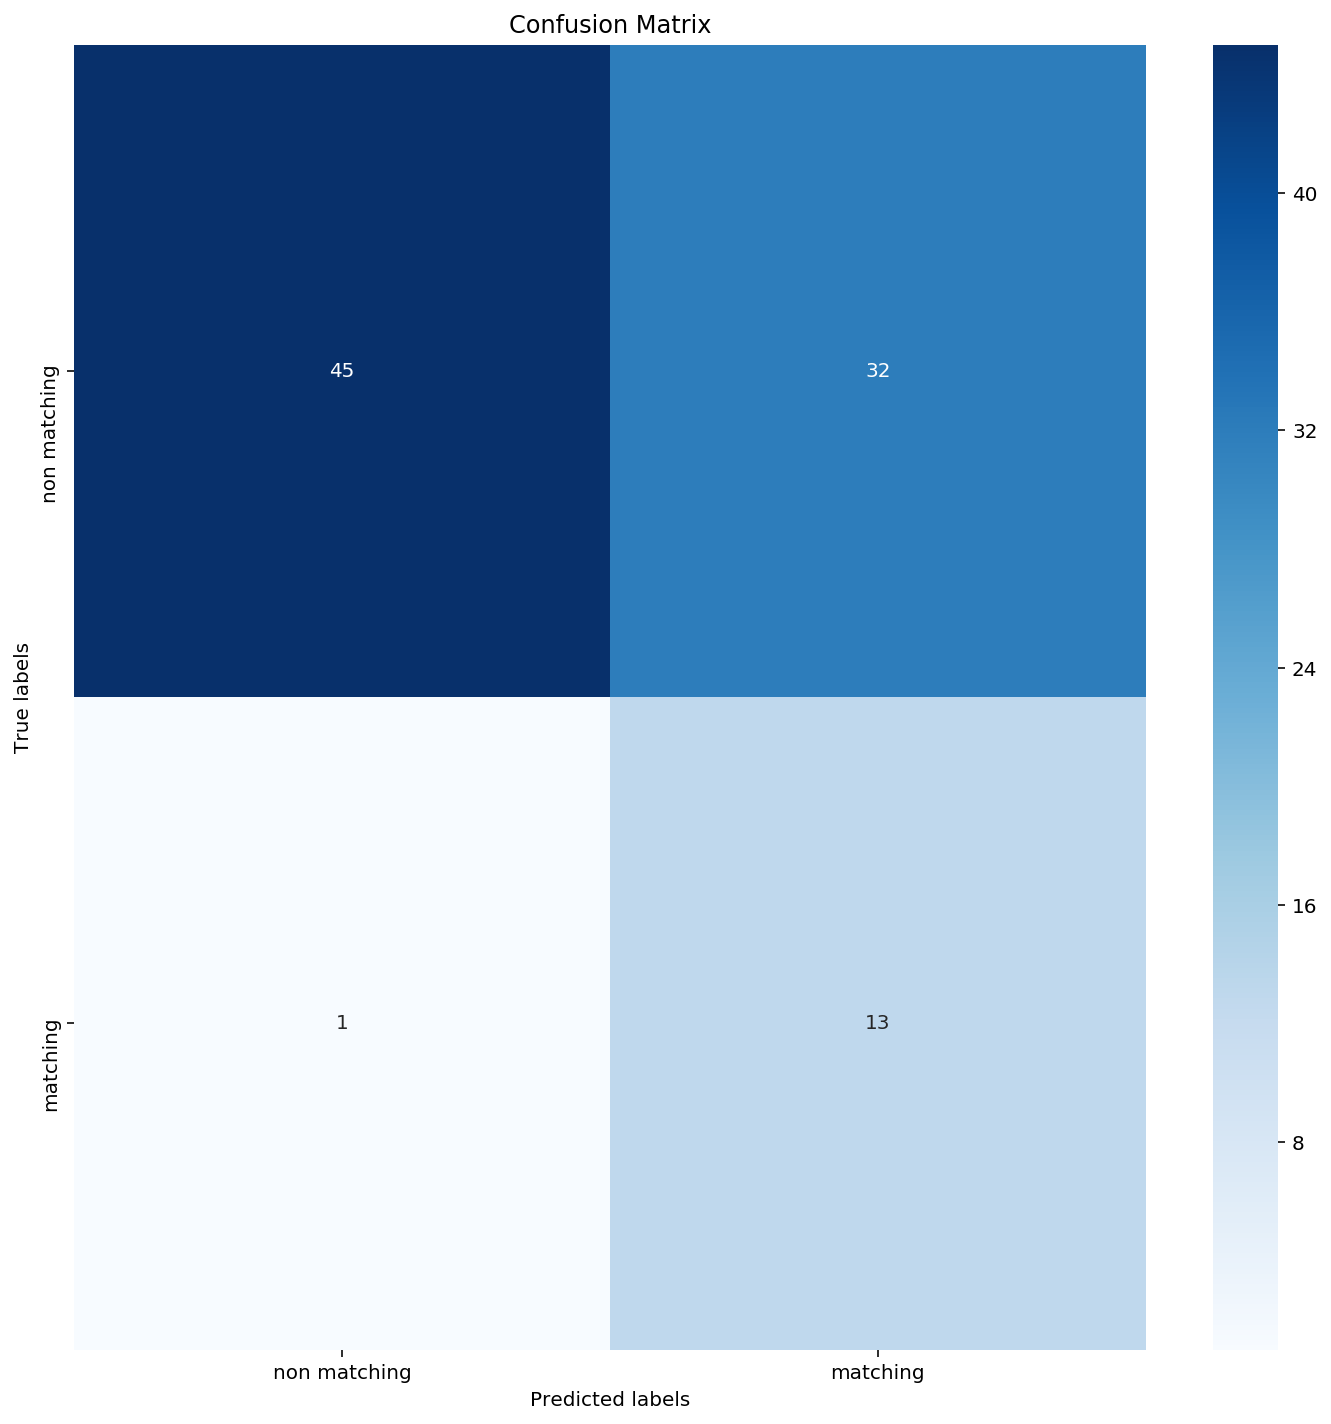

In [23]:
cm = confusion_matrix(testBinaryLabels, predictedBinaryLabels)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['non matching', 'matching'])
ax.yaxis.set_ticklabels(['non matching', 'matching'])

### Compute metrics

In [24]:
precisionValues, recallValues, fMeasureValues, supportValues = precision_recall_fscore_support(testBinaryLabels, predictedBinaryLabels)

print(row_format.format('Label','Precision', 'Recall', 'F-measure', 'Support'))

for i in range(NUM_LABELS):
    fMeasure = fMeasureValues[i]
    
    if fMeasure is None:
        fMeasure = 0.0
        
    print(row_format.format(i, round(precisionValues[i], 2), round(recallValues[i], 2), round(fMeasureValues[i],2), round(supportValues[i],2)))

          Label      Precision         Recall      F-measure        Support
              0           0.98           0.58           0.73             77
              1           0.29           0.93           0.44             14
